In [1]:
# visualize the embeddings of the family 

import torch 
import numpy as np 
from glob import glob 

In [2]:
embeds = glob("embed/embeddings/*pt")

embeds[:5], len(embeds)

(['embed/embeddings/A0A7Y3PCU8.pt',
  'embed/embeddings/A0A2I7CBF4.pt',
  'embed/embeddings/A0A314Y8B6.pt',
  'embed/embeddings/A0A3S0DUG2.pt',
  'embed/embeddings/A0A2K2D7N3.pt'],
 3219)

In [3]:
example = torch.load(embeds[0])
label = example["label"]
repr = example["mean_representations"][6]

repr[:64]

tensor([ 3.6999e-02, -2.4923e-01,  2.1452e-02,  8.9102e-03,  7.8629e-02,
        -2.8136e-03, -5.7750e-03, -1.1638e-01, -3.2035e-01,  4.2319e-03,
         4.3316e-02, -1.0257e-01,  8.4107e-04,  7.3488e-03,  2.5284e-01,
        -9.2945e-02, -2.4998e-02,  1.5784e-01, -1.9160e-03,  1.7594e-01,
        -5.8471e-02,  1.3025e-01, -1.5756e-01, -1.8048e-02,  3.8066e-02,
         1.0055e-01,  3.9826e-02, -1.1560e-02, -5.7642e-02,  2.6688e-01,
        -1.4429e-01,  9.1881e-02,  3.7277e-03, -3.0774e-01, -1.3483e-02,
        -1.6998e-01,  2.9554e-03,  5.8269e-02,  1.5703e-01, -2.3494e-02,
         8.6140e-02,  7.9109e-02,  1.0183e-01, -7.0327e-02, -1.0176e-01,
        -1.3341e-01, -8.2931e-01,  6.9310e-02, -2.5551e-02, -1.6179e-02,
        -1.9125e-01,  5.1437e-03,  1.0310e-02,  1.2916e-01,  3.5181e-03,
        -2.3211e-01,  3.5991e-01, -9.2688e-02,  3.6145e-01,  5.1052e-02,
        -4.4844e-02, -1.7700e-01, -4.3503e+00, -1.7971e-01])

In [4]:
labels = []
reprs = [] 
bglb_idx = None 

for i, pt in enumerate(embeds):

    example = torch.load(pt)
    label = example["label"]
    if label == "P22505":
        bglb_idx = i

    repr = example["mean_representations"][6]

    labels.append(label)
    reprs.append(repr)

x = torch.stack(reprs).numpy() 

x.shape, bglb_idx

((3219, 320), 2278)

In [5]:
import matplotlib.pyplot as plt 

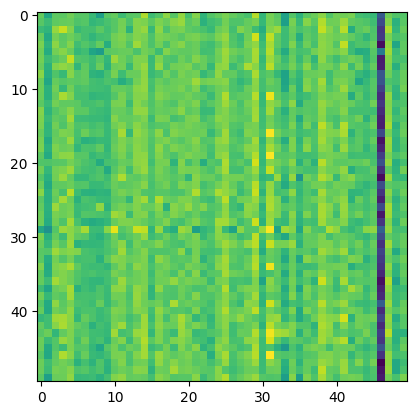

In [6]:
plt.imshow(x[:50, :50])

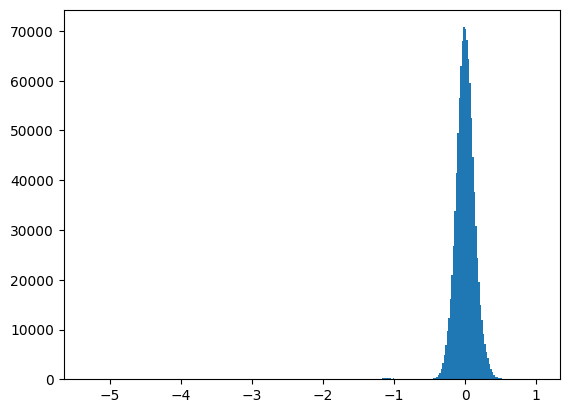

In [7]:
plt.hist(x.flatten(), bins=300); 

In [8]:
# normalize the embeddings 

x = x / np.sqrt((x ** 2).sum(1, keepdims=True))

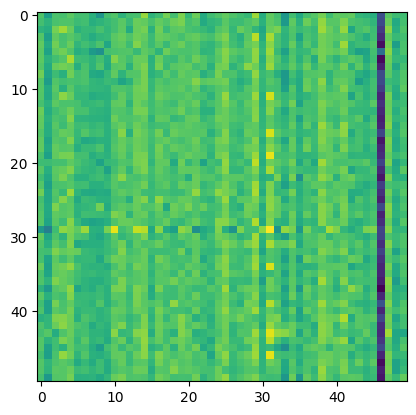

In [9]:
plt.imshow(x[:50, :50])

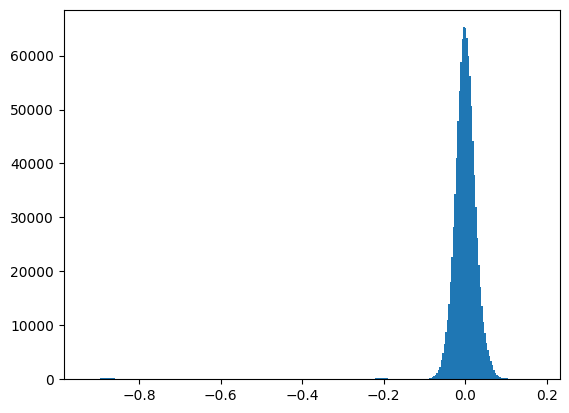

In [10]:
plt.hist(x.flatten(), bins=300); 

In [11]:
query = x[bglb_idx]
query = query / np.sqrt((query**2).sum())

query.shape

(320,)

In [12]:
x.shape

(3219, 320)

In [13]:
# tired, use knn 

similarities = x.dot(query)
sorted_ix = np.argsort(-similarities)
print("top 10 results:")
for k in sorted_ix[:10]:
  print(f"row {k}, label {labels[k]}, similarity {similarities[k]}")

top 10 results:
row 2278, label P22505, similarity 1.0000001192092896
row 108, label A0A382F135, similarity 0.9934455752372742
row 1619, label A0A0V8JEA3, similarity 0.9927933812141418
row 1185, label A0A3L6JE36, similarity 0.9921057224273682
row 852, label A0A3B9RQT9, similarity 0.9919836521148682
row 137, label A0A3C0W921, similarity 0.9914907813072205
row 2606, label A0A3R8KVM2, similarity 0.9912181496620178
row 475, label A0A7Y4RGU7, similarity 0.9911267757415771
row 2055, label A0A7Y5R2M2, similarity 0.9910458922386169
row 1631, label A0A1H0PJX9, similarity 0.9905931353569031


In [14]:
from sklearn.decomposition import PCA 

pca = PCA(32)

In [15]:
x_pca = pca.fit_transform(x)

x_pca.shape

(3219, 32)

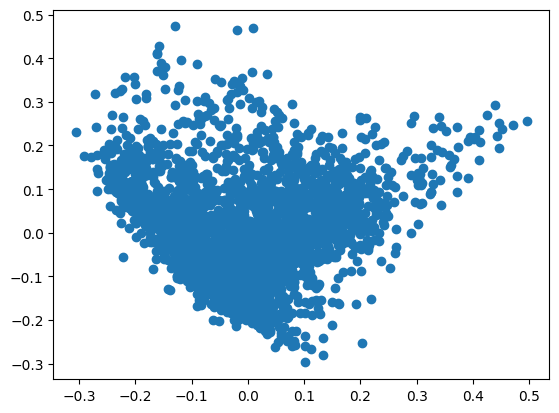

In [16]:
plt.scatter(x_pca[:, 0], x_pca[:, 1]) 

In [17]:
from sklearn import svm

In [18]:
y = np.zeros(x.shape[0]) 
y[bglb_idx] = 1  # don't worry if we just have a single positive example, still works! 

In [19]:
clf = svm.LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-6, C=0.1)
clf.fit(x, y) # train

/Users/alex/Documents/bagel-family/.venv/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(C=0.1, class_weight='balanced', max_iter=10000, tol=1e-06,
          verbose=False)

In [20]:
similarities = clf.decision_function(x)
sorted_ix = np.argsort(-similarities)
print("top 10 results:")
for k in sorted_ix[:10]:
  print(f"row {k}, label {labels[k]}, similarity {similarities[k]}")

top 10 results:
row 2278, label P22505, similarity 0.7820567888107793
row 1619, label A0A0V8JEA3, similarity 0.3341366322370122
row 2790, label A0A1C6B7Y3, similarity 0.29062367215242946
row 2606, label A0A3R8KVM2, similarity 0.26467935842019286
row 137, label A0A3C0W921, similarity 0.24190925970363797
row 108, label A0A382F135, similarity 0.20217873912781115
row 1243, label A0A3R6SRL8, similarity 0.19104957550370116
row 1396, label A0A7C4ST50, similarity 0.19065108990418933
row 2022, label A0A7X7Z1H2, similarity 0.17802977692672572
row 2464, label A0A352C427, similarity 0.15508715022302932


In [25]:
# print(" ".join(labels))

In [22]:
import pandas 

metadata = pandas.read_csv("embed/metadata.tsv", sep="\t", index_col=0)

metadata.loc[labels]

,Entry,Entry Name,Protein names,Gene Names,Organism,Length,Taxonomic lineage
From,,,,,,,
A0A7Y3PCU8,A0A7Y3PCU8,A0A7Y3PCU8_UNCEL,Glycoside hydrolase family 1 protein,HKL90_12980,Elusimicrobiota bacterium,487.0,"cellular organisms (no rank), Bacteria (superk..."
A0A2I7CBF4,A0A2I7CBF4,A0A2I7CBF4_9ENTR,deleted,NaN,NaN,NaN,NaN
A0A314Y8B6,A0A314Y8B6,A0A314Y8B6_PRUYE,Prunasin hydrolase isoform PHA,Pyn_29503,Prunus yedoensis var. nudiflora,87.0,"cellular organisms (no rank), Eukaryota (super..."
A0A3S0DUG2,A0A3S0DUG2,A0A3S0DUG2_UNCDP,Glycoside hydrolase family 1 protein,EKK58_01500,Dependentiae bacterium,472.0,"cellular organisms (no rank), Bacteria (superk..."
A0A2K2D7N3,A0A2K2D7N3,A0A2K2D7N3_BRADI,"4-hydroxy-7-methoxy-3-oxo-3,4-dihydro-2H-1,4-b...",BRADI_2g09261v3,Brachypodium distachyon (Purple false brome) (...,246.0,"cellular organisms (no rank), Eukaryota (super..."
...,...,...,...,...,...,...,...
A0A258GEW2,A0A258GEW2,A0A258GEW2_9BACT,Beta-glucosidase,B7Y94_01780,Candidatus Saccharibacteria bacterium 32-49-12,442.0,"cellular organisms (no rank), Bacteria (superk..."
A0A6A6L1S9,A0A6A6L1S9,A0A6A6L1S9_HEVBR,Beta-glucosidase,GH714_003609,Hevea brasiliensis (Para rubber tree) (Siphoni...,100.0,"cellular organisms (no rank), Eukaryota (super..."
A0A353J7U4,A0A353J7U4,A0A353J7U4_9BACT,Glycoside hydrolase family 1 protein,DDW36_04110,Candidatus Magasanikbacteria bacterium,446.0,"cellular organisms (no rank), Bacteria (superk..."


In [23]:
metadata["pca1"] = x[:, 0]
metadata["pca2"] = x[:, 1]

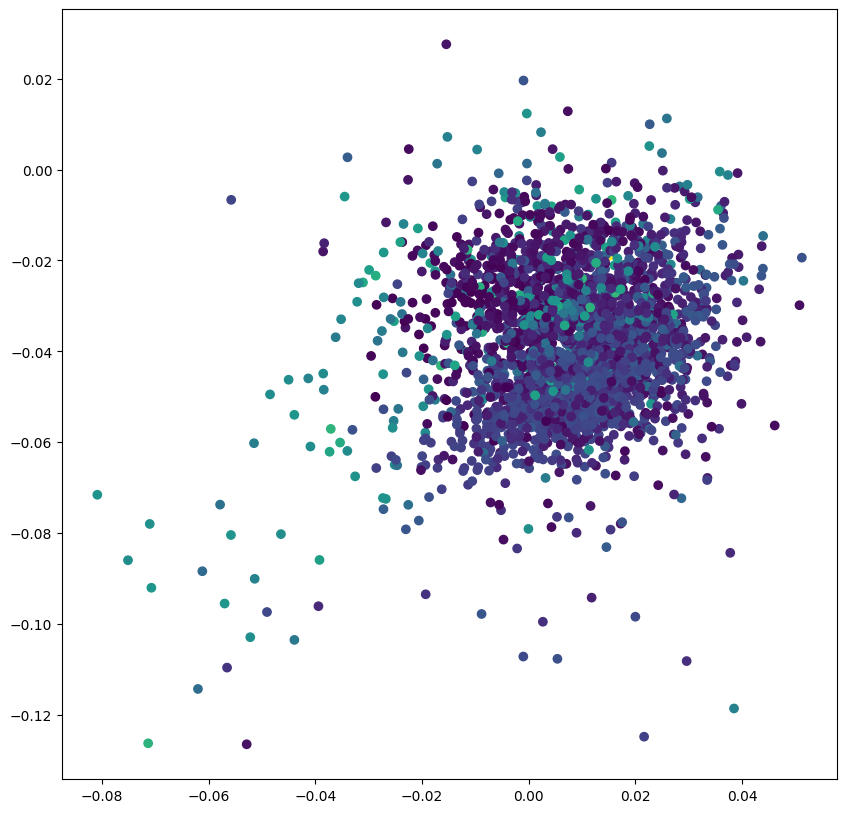

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10)) 

ax.scatter(
    metadata.pca1, 
    metadata.pca2, 
    c=metadata.Length
) 